In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [4]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem

In [5]:
data = pd.read_csv("dataset.csv")
data.head(5)

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES
0,CWYBNSVSYKQGJB-UHFFFAOYNA-N,71541095,6532,A,6.85387,pubchem,727355,9606,SLC6A4,4061,ClC=1C=C(C2CCCCNC2)C=CC1Cl
1,CTETYYAZBPJBHE-UHFFFAOYNA-N,CHEMBL1289,6532,A,6.37000,chembl20,774720,9606,SLC6A4,4061,C(#CI)COC=1C=C(Cl)C(=CC1Cl)Cl
2,FQDRMHHCWZAXJM-UHFFFAOYNA-N,125558,25553,A,9.98297,pubchem,205028,10116,SLC6A4,4061,O1C=2C=C3CC(N)CC3=CC2OC1
3,QRAWNNQNLQPNIZ-UHFFFAOYNA-N,CHEMBL205229,6532,A,7.54000,chembl20,950695,9606,SLC6A4,4061,N1C=C(CCN)C2=C1C(=CC=C2)F
4,HCFHWXDIZOAUTQ-UHFFFAOYNA-N,CHEMBL6376,25553,A,6.11000,chembl20,201505,10116,SLC6A4,4061,C1(=CC=2OCOC2C=C1C)CC(N)C


In [6]:
PandasTools.AddMoleculeColumnToFrame(data,'SMILES','Molecule')

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES,Molecule
0,CWYBNSVSYKQGJB-UHFFFAOYNA-N,71541095,6532,A,6.85387,pubchem,727355,9606,SLC6A4,4061,ClC=1C=C(C2CCCCNC2)C=CC1Cl,
1,CTETYYAZBPJBHE-UHFFFAOYNA-N,CHEMBL1289,6532,A,6.37000,chembl20,774720,9606,SLC6A4,4061,C(#CI)COC=1C=C(Cl)C(=CC1Cl)Cl,
2,FQDRMHHCWZAXJM-UHFFFAOYNA-N,125558,25553,A,9.98297,pubchem,205028,10116,SLC6A4,4061,O1C=2C=C3CC(N)CC3=CC2OC1,
3,QRAWNNQNLQPNIZ-UHFFFAOYNA-N,CHEMBL205229,6532,A,7.54000,chembl20,950695,9606,SLC6A4,4061,N1C=C(CCN)C2=C1C(=CC=C2)F,
4,HCFHWXDIZOAUTQ-UHFFFAOYNA-N,CHEMBL6376,25553,A,6.11000,chembl20,201505,10116,SLC6A4,4061,C1(=CC=2OCOC2C=C1C)CC(N)C,

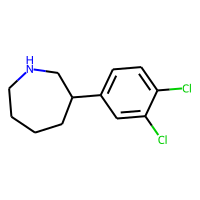
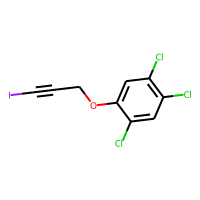
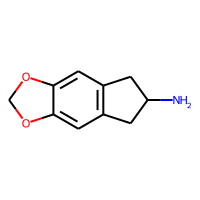
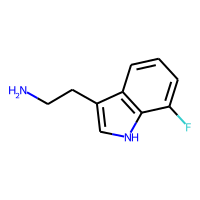
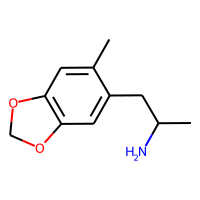

In [7]:
data.head()

In [8]:
data[["Molecule"]].values

array([[<rdkit.Chem.rdchem.Mol object at 0x0000026C9BCADD00>],
       ...,
      dtype=object)

In [9]:
data.Molecule.isna().sum()

0

In [10]:
data.Molecule.values

array([<rdkit.Chem.rdchem.Mol object at 0x0000026C9BCADD00>,
       <rdkit.Chem.rdchem.Mol object at 0x0000026C9BCADA60>, ...,
       <rdkit.Chem.rdchem.Mol object at 0x0000026CA2C35C40>], dtype=object)

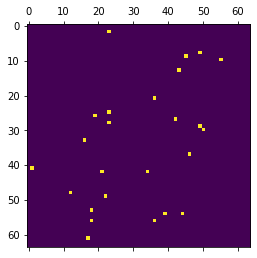

In [11]:
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar
     
fp = mol2fp(Chem.MolFromSmiles(data.loc[1,"SMILES"]))
plt.matshow(fp.reshape((64,-1)) > 0)

In [12]:
data.loc[1,"SMILES"]

'C(#CI)COC=1C=C(Cl)C(=CC1Cl)Cl'

In [13]:
fp.reshape((64,-1))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [14]:
64*64

4096

In [15]:
fp

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [16]:
fp = AllChem.GetHashedMorganFingerprint(Chem.MolFromSmiles(data.loc[1,"SMILES"]), 2, nBits=4096)
ar = np.zeros((1,), dtype=np.int8)
DataStructs.ConvertToNumpyArray(fp, ar)

In [17]:
fp

In [18]:
ar

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [19]:
np.zeros((1,), dtype=np.int8)

array([0], dtype=int8)

In [20]:
data["FPs"] = data.Molecule.apply(mol2fp)

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES,Molecule,FPs
0,CWYBNSVSYKQGJB-UHFFFAOYNA-N,71541095,6532,A,6.85387,pubchem,727355,9606,SLC6A4,4061,ClC=1C=C(C2CCCCNC2)C=CC1Cl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CTETYYAZBPJBHE-UHFFFAOYNA-N,CHEMBL1289,6532,A,6.37000,chembl20,774720,9606,SLC6A4,4061,C(#CI)COC=1C=C(Cl)C(=CC1Cl)Cl,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,FQDRMHHCWZAXJM-UHFFFAOYNA-N,125558,25553,A,9.98297,pubchem,205028,10116,SLC6A4,4061,O1C=2C=C3CC(N)CC3=CC2OC1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,QRAWNNQNLQPNIZ-UHFFFAOYNA-N,CHEMBL205229,6532,A,7.54000,chembl20,950695,9606,SLC6A4,4061,N1C=C(CCN)C2=C1C(=CC=C2)F,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,HCFHWXDIZOAUTQ-UHFFFAOYNA-N,CHEMBL6376,25553,A,6.11000,chembl20,201505,10116,SLC6A4,4061,C1(=CC=2OCOC2C=C1C)CC(N)C,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

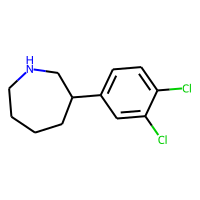
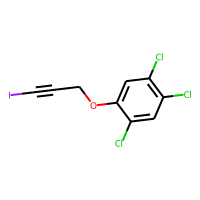
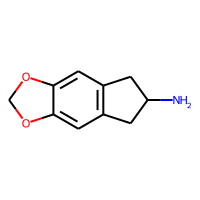
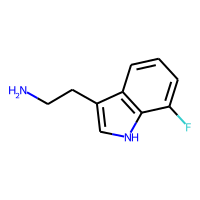
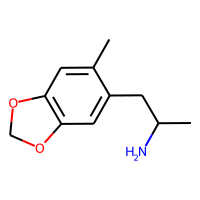

In [21]:
data.head(5)

In [22]:
X = np.stack(data.FPs.values)
print(X.shape)

(7228, 4096)


In [23]:
y = data.pXC50.values.reshape((-1,1))

In [24]:
y

array([[6.85387],
       [6.37   ],
       [9.98297],
       ...,
       [6.60206],
       [6.8    ],
       [6.14   ]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.05, random_state=42)
#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [26]:
feature_select = VarianceThreshold(threshold=0.05)
X_train = feature_select.fit_transform(X_train)
X_validation = feature_select.transform(X_validation)
X_test = feature_select.transform(X_test)
X_train.shape

(6179, 222)

In [27]:
# Let's get those arrays transfered to the GPU memory as tensors
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# If you don't have a GPU, buy a graphics card. I have for a long time used a 1060 GTX, which is not that expensive anymore.
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()
X_train

cpu


tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

In [28]:
X_train.shape

torch.Size([6179, 222])

In [29]:
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)
validation_dataset = TensorDataset(X_validation, y_validation)

In [30]:
train_dataset

In [31]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,
                                          batch_size=256,
                                          shuffle=False)

In [32]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        # Three layers and a output layer
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer
        #Layer normalization for faster training
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)        
        #LeakyReLU will be used as the activation function
        self.activation = nn.LeakyReLU()
        #Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
     
    def forward(self, x):# Forward pass: stacking each layer together
        # Fully connected =&amp;gt; Layer Norm =&amp;gt; LeakyReLU =&amp;gt; Dropout times 3
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)
        #Final output layer
        out = self.fc_out(out)
        return out

In [69]:
#Defining the hyperparameters
input_size = X_train.size()[-1]     # The input size should fit our fingerprint size
hidden_size = 1024   # The size of the hidden layer
dropout_rate = 0.60    # The dropout rate
output_size = 1        # This is just a single task, so this will be one
learning_rate = 0.009  # The learning rate for the optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)

In [70]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [71]:
model.train() #Ensure the network is in "train" mode with dropouts active
epochs = 200
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pa
         
        output = model(fps) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        optimizer.step() # Optimize the weights
         
        running_loss += loss.item()
    else:
        if e%10 == 0:
            validation_loss = torch.mean(( y_validation - model(X_validation) )**2).item()
            print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))

Epoch:   0 Training loss: 6.80 Validation loss: 1.45
Epoch:  10 Training loss: 0.45 Validation loss: 0.57
Epoch:  20 Training loss: 0.35 Validation loss: 0.54
Epoch:  30 Training loss: 0.30 Validation loss: 0.50
Epoch:  40 Training loss: 0.25 Validation loss: 0.45
Epoch:  50 Training loss: 0.23 Validation loss: 0.46
Epoch:  60 Training loss: 0.22 Validation loss: 0.49
Epoch:  70 Training loss: 0.21 Validation loss: 0.43
Epoch:  80 Training loss: 0.19 Validation loss: 0.44
Epoch:  90 Training loss: 0.19 Validation loss: 0.47
Epoch: 100 Training loss: 0.18 Validation loss: 0.49
Epoch: 110 Training loss: 0.17 Validation loss: 0.50
Epoch: 120 Training loss: 0.18 Validation loss: 0.49
Epoch: 130 Training loss: 0.16 Validation loss: 0.43
Epoch: 140 Training loss: 0.15 Validation loss: 0.49
Epoch: 150 Training loss: 0.16 Validation loss: 0.44
Epoch: 160 Training loss: 0.15 Validation loss: 0.46
Epoch: 170 Training loss: 0.15 Validation loss: 0.46
Epoch: 180 Training loss: 0.14 Validation loss

In [56]:
model.eval() #Swith to evaluation mode, where dropout is switched off
y_pred_train = model(X_train)
y_pred_validation = model(X_validation)
y_pred_test = model(X_test)

In [57]:
torch.mean(( y_train - y_pred_train )**2).item()

0.23624488711357117

In [58]:
torch.mean(( y_validation - y_pred_validation )**2).item()

0.4492095708847046

In [59]:
torch.mean(( y_test - y_pred_test )**2).item()

0.40933188796043396

In [60]:
def flatten(tensor):
    return tensor.cpu().detach().numpy().flatten()

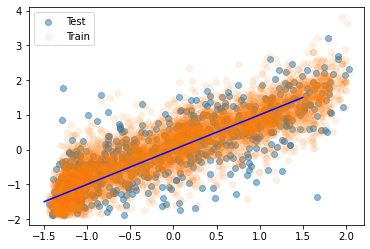

In [61]:
plt.scatter(flatten(y_pred_test), flatten(y_test), alpha=0.5, label="Test")
plt.scatter(flatten(y_pred_train), flatten(y_train), alpha=0.1, label="Train")
plt.legend()
plt.plot([-1.5, 1.5], [-1.5,1.5], c="b")

In [62]:
def predict_smiles(smiles):
    fp = mol2fp(Chem.MolFromSmiles(smiles)).reshape(1,-1)
    fp_filtered = feature_select.transform(fp)
    fp_tensor = torch.tensor(fp_filtered, device=device).float()
    prediction = model(fp_tensor)
    #return prediction.cpu().detach().numpy()
    pXC50 = scaler.inverse_transform(prediction.cpu().detach().numpy())
    return pXC50[0][0]

predict_smiles('Cc1ccc2c(N3CCNCC3)cc(F)cc2n1')

8.583546